In [37]:
import numpy as np
import matplotlib.pyplot as plt

def func(x,y):
    '''Function'''
    return np.cos(2.*x)+np.sin(4.*y)+np.exp(1.5*x**2+0.7*y**2)+2.*x

def dfunc_dx(x,y):
    '''Derivive WRT x'''
    return -2.*np.sin(2.*x)+3.*x*np.exp(1.5*x**2+0.7*y**2)+2.

def dfunc_dy(x,y):
    '''Derivive WRT y'''
    return 4.*np.cos(4.*y)+1.4*y*np.exp(1.5*x**2+0.7*y**2)

def dfunc_dalpha(x,y,alpha):
    '''Derivive WRT alpha'''
    x1=x-alpha*dfunc_dx(x,y)
    y1=y-alpha*dfunc_dy(x,y)
    
    return dfunc_dx(x,y)*dfunc_dx(x1,y1)+dfunc_dy(x,y)*dfunc_dy(x1,y1)

def bisect_root(x,y):
    '''Calculate the root with the bisection method to get alpha'''

    a0=0.0
    a1=0.1
    
    while dfunc_dalpha(x,y,a1)*dfunc_dalpha(x,y,a0) > 0.0:
        a1+=0.01   

    while abs(dfunc_dalpha(x,y,a0)) > 1.0e-10:
        
        an=(a0+a1)/2.0

        if dfunc_dalpha(x,y,an)*dfunc_dalpha(x,y,a0) < 0:
            a1=an
        else:
            a0=an


    return a0

def steep_desc(x0,y0,tol=1e-10):
    '''Perform the steepest descent minimization'''
    
    error=10.0*tol
    
    descent=[np.array([x0,y0])]
    while error > tol:
    
        alpha=bisect_root(x0,y0)
        x1=x0-alpha*dfunc_dx(x0,y0)
        y1=y0-alpha*dfunc_dy(x0,y0)
        
        error = abs(func(x0,y0)-func(x1,y1))
        
        x0=x1
        y0=y1
        
        descent.append(np.array([x1,y1]))

    return np.stack(descent)



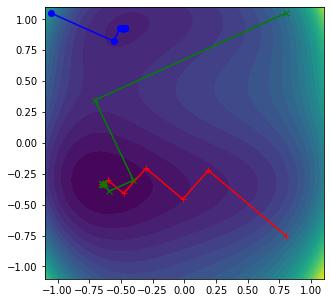

In [38]:
# Try some initial guesses
x0=0.8
y0=-0.75
descent1=steep_desc(x0,y0)

x0=0.8
y0=1.05
descent2=steep_desc(x0,y0)

x0=-1.05
y0=1.05
descent3=steep_desc(x0,y0)

pts=300
x=np.linspace(-1.1,1.1,pts)
y=np.linspace(-1.1,1.1,pts)


z=np.zeros((pts,pts))
for xpt in range(pts):
    for ypt in range(pts):
        z[ypt,xpt]=func(x[xpt],y[ypt])
        

fig1=plt.subplots(figsize=(5,5))
ax1=plt.contourf(x,y,z,30)
plt.plot(descent1[:,0],descent1[:,1],'r+-')
plt.plot(descent2[:,0],descent2[:,1],'gx-')
plt.plot(descent3[:,0],descent3[:,1],'bo-')


plt.savefig('steepest_descent.pdf',bbox_inches='tight')
plt.show()